In [ ]:
import av

filepath = "/Users/Matey/Content/Helck/[SubsPlease] Helck - 15 (1080p) [309E209E].mkv"
with av.open(filepath) as container:
    subtitle = container.streams.subtitles[0]
    # for a in subtitle.decode():
    #     help(a)
    with av.open(f"{filepath[:-4]}.ass", 'w') as sub:
        sub.mux(subtitle.decode())


: 

: 

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("facebook/nllb-200-distilled-600M",use_auth_token=True, src_lang="eng_Latn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M", use_auth_token=True)


In [ ]:

# article = "So this was the aftermath of his training, huh?"
article = r"<s>Getting irritated at my own failings </s> never has been </s><s> and never will be </s><s> a part of my life. </s><s> I will simply </s><s> confront the evils that <n> force this reality upon us, </s><s> and I will simply...</s>"

article = [
    "Getting irritated at my own failings",
    "never has been",
    "and never will be",
    "a part of my life. ",
    "I will simply confront the evils that <n> force this reality upon us,",
    "and I will simply..."
]
article = " ".join(article)
inputs = tokenizer(article, return_tensors="pt")

translated_tokens = model.generate(
    **inputs, forced_bos_token_id=tokenizer.lang_code_to_id["bul_Cyrl"], max_length=len(article)*2
)
tokenizer.batch_decode(translated_tokens)

ValueError: Unable to create tensor, you should probably activate truncation and/or padding with 'padding=True' 'truncation=True' to have batched tensors with the same length. Perhaps your features (`input_ids` in this case) have excessive nesting (inputs type `list` where type `int` is expected).

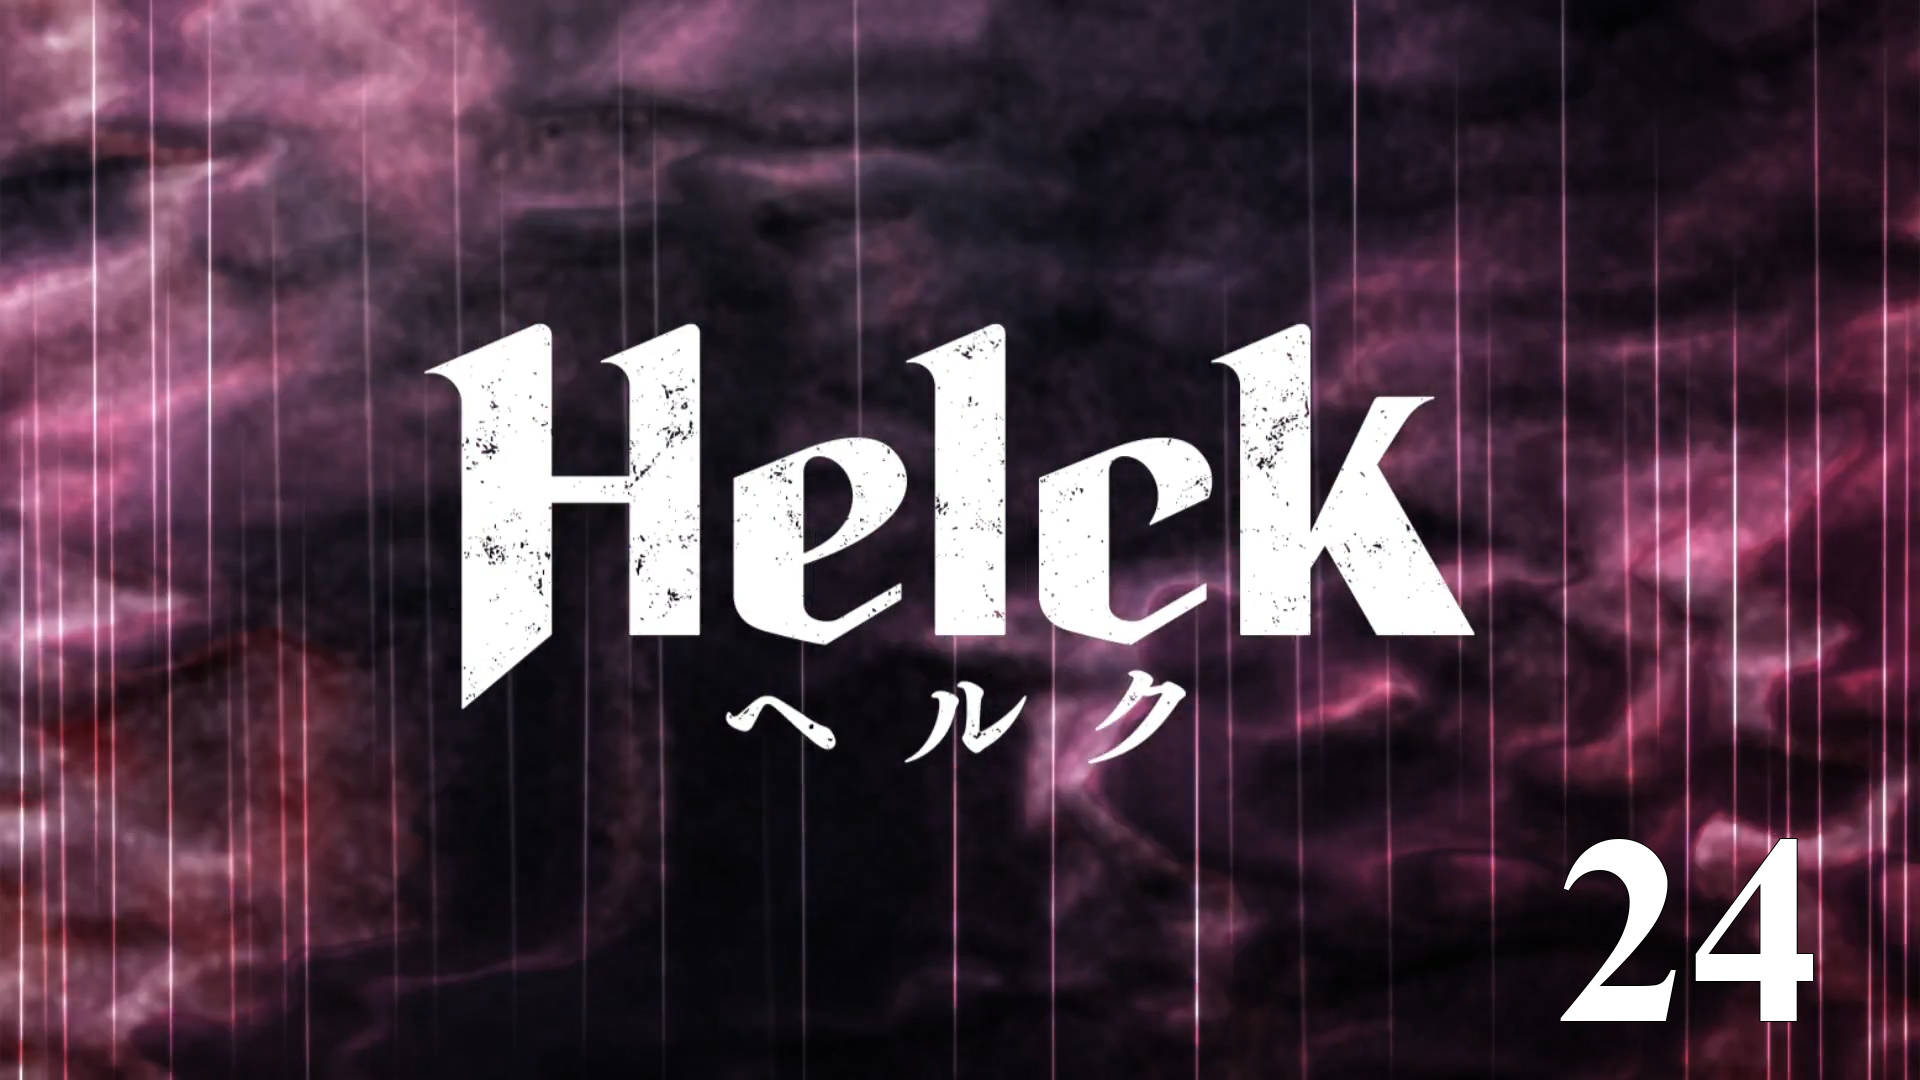

In [1]:


def generate_thumbnail(thumbnail_path: str, episode_num: int, font_name: str = "Impact", factor: float = 0.25, stroke_width: int = 10, stroke_fill: str = "white", text_fill: str = "black", font_weight: int = 0, x=0, y=0, **kwargs):
    from PIL import Image, ImageDraw, ImageFont
    with Image.open(thumbnail_path) as im:
        draw = ImageDraw.Draw(im)
        episode_num = f"{episode_num:0>2}"
        font = ImageFont.truetype(font_name, size=int(im.height * factor),index=font_weight)
        font_length = font.getlength(episode_num)
        font_ascent, font_descent = font.getmetrics()
        draw.text(((0.95 - font_length/im.width)*im.width - x, (1-(font_descent+font_ascent)/im.height)*im.height - y), episode_num, font=font, fill=text_fill,stroke_width=stroke_width,stroke_fill=stroke_fill, **kwargs)
        
        im.save(f"{thumbnail_path[:-4]}_{episode_num}.png","PNG")
        return im, f"{thumbnail_path[:-4]}_{episode_num}.png"

font_config = {
    "font_name": "Roboto-Black",
    "stroke_width":1,
    "stroke_fill": "black",
    "text_fill":"white",
    "font_weight":0,
    "factor": 0.25,
}



import json

with open('/Users/Matey/Content/Helck/upload_properties.json') as f:
    file = json.load(f)

image = file.get("thumbnail_path")
update = file.get("thumbnail_font")
font_config.update(update)

generate_thumbnail(image,24, **font_config)[0]

In [7]:
import torch

ls = [23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688, 23141.0688]
tens = torch.tensor(ls)
tens = tens[(tens-tens.mean()/tens.std())<3]
tens.mean()

tensor(23141.0645)

In [ ]:
from google.cloud import translate_v3 as translate


def create_glossary(
    project_id: str = "YOUR_PROJECT_ID",
    input_uri: str = "YOUR_INPUT_URI",
    glossary_id: str = "YOUR_GLOSSARY_ID",
    timeout: int = 180,
) -> translate.Glossary:
    """
    Create a equivalent term sets glossary. Glossary can be words or
    short phrases (usually fewer than five words).
    https://cloud.google.com/translate/docs/advanced/glossary#format-glossary
    """
    client = translate.TranslationServiceClient()

    # Supported language codes: https://cloud.google.com/translate/docs/languages
    source_lang_code = "en"
    target_lang_code = "bg"
    location = "us-central1"  # The location of the glossary

    name = client.glossary_path(project_id, location, glossary_id)
    language_codes_set = translate.Glossary.LanguageCodePair()
    language_codes_set.source_language_code = source_lang_code
    language_codes_set.target_language_code = target_lang_code

    gcs_source = translate.types.GcsSource(input_uri=input_uri)

    input_config = translate.types.GlossaryInputConfig(gcs_source=gcs_source)


    glossary = translate.types.Glossary(
        name=name, language_pair=language_codes_set, input_config=input_config
    )
    # glossary = translate.types.Glossary(
    #     name=name, language_codes_set=language_codes_set, input_config=input_config
    # )

    parent = f"projects/{project_id}/locations/{location}"
    # glossary is a custom dictionary Translation API uses
    # to translate the domain-specific terminology.
    operation = client.create_glossary(parent=parent, glossary=glossary)

    result = operation.result(timeout)
    print(f"Created: {result.name}")
    print(f"Input Uri: {result.input_config.gcs_source.input_uri}")

    return result

In [ ]:
project_id = "natural-pipe-393107"
create_glossary(project_id, "gs://mtl-agent/glossary.csv", "anime-terms-glossary")

Created: projects/695995046858/locations/us-central1/glossaries/anime-terms-glossary
Input Uri: gs://mtl-agent/glossary.csv


name: "projects/695995046858/locations/us-central1/glossaries/anime-terms-glossary"
language_pair {
  source_language_code: "en"
  target_language_code: "bg"
}
input_config {
  gcs_source {
    input_uri: "gs://mtl-agent/glossary.csv"
  }
}
entry_count: 3
submit_time {
  seconds: 1689722511
  nanos: 979498494
}
end_time {
}
display_name: "anime-terms-glossary"